In [1]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from fydyc_dataset import FydycDataset
import os
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

class MLP(nn.Module):
   
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.hidden3 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.tanh(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.elu(self.hidden4(x))
        x = self.output(x)
        x = self.output(x)
        return x
        
model = MLP(hidden_size=16)
model.load_state_dict(torch.load('fydyc/model4.pth'))


csv_file='fydyc/fydyc_real.csv'
dataset = FydycDataset(csv_file)
data = pd.read_csv(csv_file)


FileNotFoundError: [Errno 2] No such file or directory: 'fydyc/model4.pth'

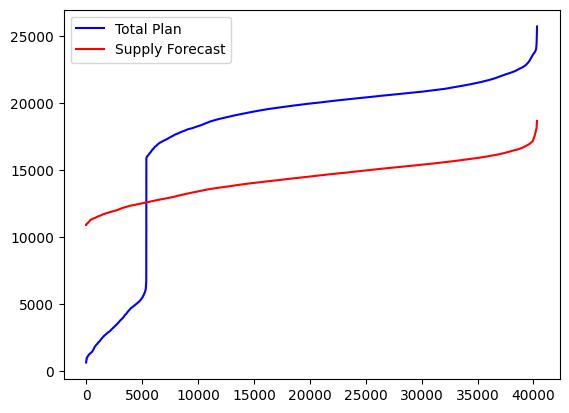

原先风电预测+光伏预测+火电计划+水电计划 和 供电预测


In [2]:
# 计算 "风电预测"、"光伏预测"、"火电计划" 和 "水电计划" 的和
data['total_plan'] = data.apply(lambda row: row['风电预测'] + row['光伏预测'] + row['火电计划'] + row['水电计划'], axis=1)

# 提取 "供电预测" 字段
supply_forecast = data['供电预测']




# 对 'total_plan' 和 'supply_forecast' 进行排序
data['total_plan'] = data['total_plan'].sort_values().reset_index(drop=True)
supply_forecast = supply_forecast.sort_values().reset_index(drop=True)

# 创建一个新的图形
plt.figure()

# 绘制 'total_plan'
plt.plot(data['total_plan'], label='Total Plan', color='blue')

# 绘制 'supply_forecast'
plt.plot(supply_forecast, label='Supply Forecast', color='red')

# 添加图例
plt.legend()

# 显示图形
plt.show()

print("原先风电预测+光伏预测+火电计划+水电计划 和 供电预测")

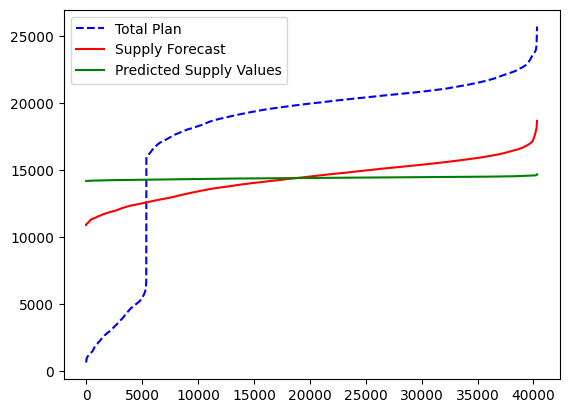

In [5]:
model.eval()  # 将模型设置为评估模式
predicted_values = []

# 遍历 'total_plan' 中的每个值
for value in data['total_plan']:
    # 将当前值标准化
    normalized_value = dataset.scaler_features.transform([[value]])
    input_tensor = torch.from_numpy(normalized_value).float()
    input_tensor = input_tensor.view(1, -1)  # 确保其形状与模型输入的形状相匹配

    with torch.no_grad():  # 不需要计算梯度
        output_tensor = model(input_tensor)
        
    output_value = output_tensor.numpy()  # 将输出张量转换为 numpy 数组
    predicted_value = dataset.scaler_labels.inverse_transform(output_value)
    
    # 将预测值添加到列表中
    predicted_values.append(predicted_value[0][0])

# 将预测值转换为 pandas 序列，并进行排序
predicted_values = pd.Series(predicted_values).sort_values().reset_index(drop=True)

# 创建一个新的图形
plt.figure()

# 绘制 'total_plan'
plt.plot(data['total_plan'], '--',label='Total Plan', color='blue')

# 绘制 'supply_forecast'
plt.plot(supply_forecast, label='Supply Forecast', color='red')

# 绘制预测值
plt.plot(predicted_values, label='Predicted Supply Values', color='green')

# 添加图例
plt.legend()

# 显示图形
plt.show()
